# **LSTM: Stock Prediction**

* **1.) What was the change in price of the stock over time?**
* **2.) What was the daily return of the stock on average?**
* **3.) What was the moving average of the various stocks?**
* **4.) What was the correlation between different stocks'?**
* **5.) How much value do we put at risk by investing in a particular stock?**
* **6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)**

<hr>

# **Step 1 - Importing the libraries**

**Configuration Libraries**

In [4]:
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

**Common Libraries**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

**Machine Learning Libraries**

In [6]:
from sklearn.metrics import *
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

<hr>

# **Step 2 - Data Gathering Phase**

**We need our stock API**

In [7]:
!pip install yfinance # IN CASE THIS ERROR, TRY UPDATING THE IDE THAT YOU ARE USING

In [8]:
import yfinance as yf #API An API (Application Programming Interface) is like a messenger between two applications. It allows them to talk to each other and exchange information.
#You send a request to an API for specific data or actions.
#The API sends back the response—like weather information, social media posts, or predictions from a machine learning model.

<hr>

**Grasp the data from the API**

In [9]:
data = yf.Ticker("AAPL") #Ticker access stock market data for a specific company aapl is apple share

In [10]:
data #we can only see object heere not data for that use history

yfinance.Ticker object <AAPL>

**I need to also distribute the data based on a data**

In [11]:
hist = data.history(period = "1mo") #extract data on a periodic basis  #1month period data history

In [12]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-28 00:00:00-04:00,233.063595,234.472034,232.294437,233.143494,36087100,0.00,0.0
2024-10-29 00:00:00-04:00,232.843827,234.072471,232.064686,233.413193,35417200,0.00,0.0
2024-10-30 00:00:00-04:00,232.354358,233.213414,229.297724,229.847122,47070900,0.00,0.0
2024-10-31 00:00:00-04:00,229.087951,229.577418,225.122313,225.661728,64370100,0.00,0.0
2024-11-01 00:00:00-04:00,220.727153,225.102345,220.027926,222.665024,65276700,0.00,0.0
2024-11-04 00:00:00-05:00,220.747138,222.545148,219.468546,221.766006,44944500,0.00,0.0
2024-11-05 00:00:00-05:00,221.556241,223.703872,220.896963,223.204422,28111300,0.00,0.0
2024-11-06 00:00:00-05:00,222.365355,225.821559,220.946918,222.475235,54561100,0.00,0.0
2024-11-07 00:00:00-05:00,224.383137,227.629565,224.323205,227.229996,42137700,0.00,0.0


**Description of the organization using the stock data**

In [13]:
data.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

**Convert the data into datetime format**

In [14]:
current_date = datetime.now()

In [15]:
current_date

datetime.datetime(2024, 11, 28, 12, 37, 58, 150113)

* **Start Date = Current_Date (Year = 2024) - 1 = 2023**
* **Current_Date.month = Nov**
* **Current_Data.day - 1 = 20 - 1 = 19**
* **Start_Date = 19th Nov 2023**

In [16]:
start_date = datetime(current_date.year - 1, current_date.month, current_date.day - 1)

In [17]:
start_date

datetime.datetime(2023, 11, 27, 0, 0)

**Now, I will be working on the data of 1 complete year. We are firstly specified our date range, in which we want to work and then we have got the data of that particular time-frame, done using yfinance**

In [18]:
data = yf.download("AAPL", start_date, current_date)

[*********************100%***********************]  1 of 1 completed


In [19]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-11-27 00:00:00+00:00,188.864731,189.789993,190.669998,188.899994,189.919998,40552600
2023-11-28 00:00:00+00:00,189.471771,190.399994,191.080002,189.399994,189.779999,38415400
2023-11-29 00:00:00+00:00,188.446777,189.369995,192.089996,188.970001,190.899994,43014200
2023-11-30 00:00:00+00:00,189.023956,189.949997,190.320007,188.190002,189.839996,48794400
2023-12-01 00:00:00+00:00,190.307678,191.240005,191.559998,189.229996,190.330002,45679300


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2023-11-27 00:00:00+00:00 to 2024-11-27 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  254 non-null    float64
 1   (Close, AAPL)      254 non-null    float64
 2   (High, AAPL)       254 non-null    float64
 3   (Low, AAPL)        254 non-null    float64
 4   (Open, AAPL)       254 non-null    float64
 5   (Volume, AAPL)     254 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


**Column header preprocessing**

In [21]:
data.columns = [f"{col[0]}" for col in data.columns] #(Adj Close, AAPL) using list cpmprehension we kept pnly one name you can keep both as well
#"{col[0]}_{col[1]}"

In [22]:
data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-11-27 00:00:00+00:00,188.864731,189.789993,190.669998,188.899994,189.919998,40552600
2023-11-28 00:00:00+00:00,189.471771,190.399994,191.080002,189.399994,189.779999,38415400
2023-11-29 00:00:00+00:00,188.446777,189.369995,192.089996,188.970001,190.899994,43014200
2023-11-30 00:00:00+00:00,189.023956,189.949997,190.320007,188.190002,189.839996,48794400
2023-12-01 00:00:00+00:00,190.307678,191.240005,191.559998,189.229996,190.330002,45679300


**Visualize the data**

In [23]:
fig = px.line(data, x = data.index, y = "Adj Close", title = "Apple Stock Price")
fig.show()

**This data shows the upwards trend, there is no seasonality**

<hr>

**Data Description**

In [24]:
data.describe()

,Adj Close,Close,High,Low,Open,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,201.795197,202.316771,203.979921,200.430945,202.152992,5.757165e+07
std,22.237638,22.054554,22.215029,21.697526,21.989154,3.031527e+07
min,164.405121,165.000000,166.399994,164.080002,165.350006,2.811130e+07
25%,183.489807,184.279999,185.244995,182.282497,183.937500,4.215368e+07
50%,194.492180,195.445000,196.919998,194.154999,195.409996,5.013555e+07
75%,224.425591,224.672501,226.762501,222.955002,224.622505,6.415668e+07
max,236.220108,236.479996,237.490005,234.449997,236.479996,3.186799e+08


**As this is a stock data, so markets are closed on weekends and national holiday. Hence whenever you are going to work with the stock data, there would be difference due to the above mentioned**

In [25]:
365 - 104

261

<Axes: xlabel='Adj Close', ylabel='Density'>

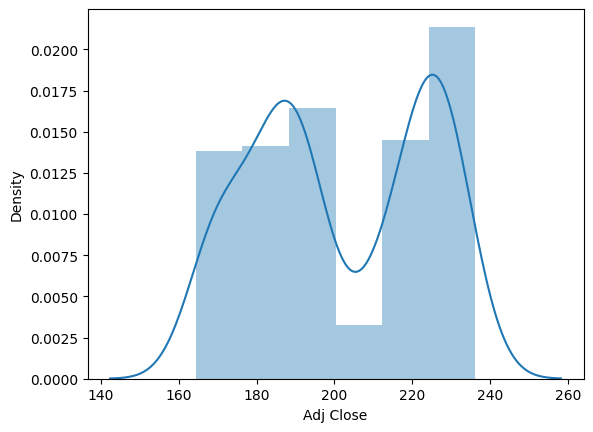

In [26]:
sns.distplot(data["Adj Close"])
#below distrubution is known as bimodel distribution means two separate grps within the same data

# **Step 3 - Information on Close Price**

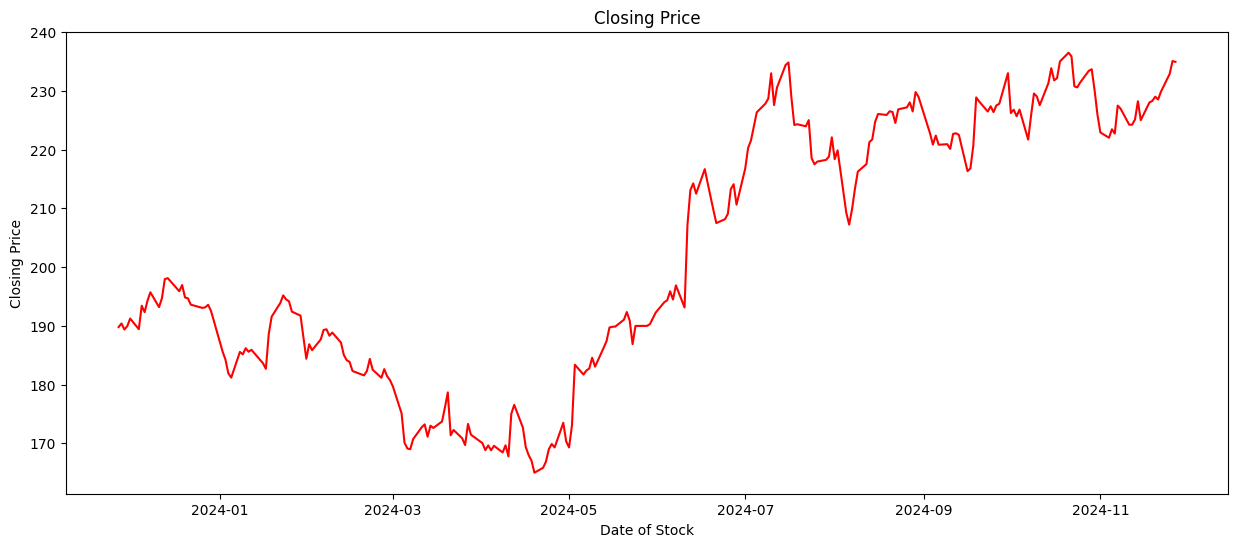

In [27]:
plt.figure(figsize = (15, 6))
plt.plot(data.Close, color = "red")
plt.title("Closing Price")
plt.xlabel("Date of Stock")
plt.ylabel("Closing Price")
plt.show()

# **Step 4 - Information on the volumn of assests sold**

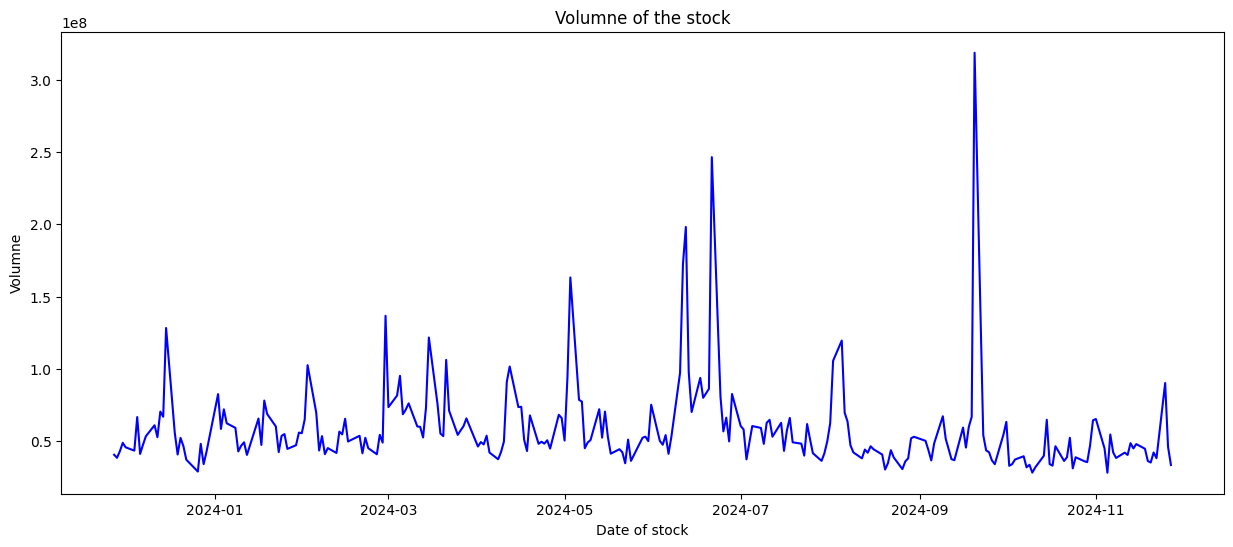

In [28]:
plt.figure(figsize = (15, 6))
plt.plot(data.Volume, color = "blue")
plt.title("Volumne of the stock")
plt.xlabel("Date of stock")
plt.ylabel("Volumne")
plt.show()

**Using this graph, we can conclude that the trade of assests was normal in the intial phase. But as soon as we touched the mid-year, we can see a huge inflation in the volume of stock being traded**
  * **In May to October, there has been a lot of trading**

<hr>

# **Step 5 - Working with Moving Average**

In [29]:
moving_average = [10, 20, 50]

for x in moving_average:
  column_name = f"MA for {x} days"
  data[column_name] = data["Close"].rolling(window = x).mean()

In [30]:
fig = px.line(data, x = data.index, y = ["MA for 10 days", "MA for 20 days", "MA for 50 days"])
fig.show()

**Based on the graph:**
  * **The MA taken for 50 days, is not able to give us the complete information about the trends, it's too smooth with respect to data**
  * **If we talk about 10 days or 20 days, it seems more promising as it is able to capture more information about the data**
  * **`We can move forward with the MA data having average rolled between 10 or 20 days`**

<hr>

# **Step 6 - Daily Returns of the stock on based on Average**
  * **This will help us understand the risk associated with investment in a particular stock. So, to judge that we to look on the daily changes**

In [31]:
data["Daily Return"] = data["Close"].pct_change()

In [32]:
data["Daily Return"].head()

,Daily Return
Date,
2023-11-27 00:00:00+00:00,NaN
2023-11-28 00:00:00+00:00,0.003214
2023-11-29 00:00:00+00:00,-0.005410
2023-11-30 00:00:00+00:00,0.003063
2023-12-01 00:00:00+00:00,0.006791


In [33]:
#formula for percentage change
#1-(today's price/yesterday's price)

**Visualize the percentage that has been changed from the last year**

In [34]:
fig = px.line(data, x = "Daily Return", title = "Change in the stock on the daily basis")
fig.show()

**If we are investing in this stock, there exists a fair amount of chance that changest will be between -0.03 to 0.03**

* **Link to Ticket data: https://www.nasdaq.com/market-activity/stocks/screener**

<hr>

# **Step 7 - Training and Testing data**

In [35]:
data = yf.download("AAPL", start = "2014-01-01", end = datetime.now())

[*********************100%***********************]  1 of 1 completed


In [36]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2014-01-02 00:00:00+00:00,17.234295,19.754642,19.893929,19.715000,19.845715,234684800
2014-01-03 00:00:00+00:00,16.855734,19.320715,19.775000,19.301071,19.745001,392467600
2014-01-06 00:00:00+00:00,16.947649,19.426071,19.528570,19.057142,19.194643,412610800
2014-01-07 00:00:00+00:00,16.826441,19.287144,19.498571,19.211430,19.440001,317209200
2014-01-08 00:00:00+00:00,16.933006,19.409286,19.484285,19.238930,19.243214,258529600
...,...,...,...,...,...,...
2024-11-21 00:00:00+00:00,228.520004,228.520004,230.160004,225.710007,228.880005,42108300
2024-11-22 00:00:00+00:00,229.869995,229.869995,230.720001,228.059998,228.059998,38168300


In [37]:
data.columns = [f"{col[0]}" for col in data.columns]

In [38]:
data

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-01-02 00:00:00+00:00,17.234295,19.754642,19.893929,19.715000,19.845715,234684800
2014-01-03 00:00:00+00:00,16.855734,19.320715,19.775000,19.301071,19.745001,392467600
2014-01-06 00:00:00+00:00,16.947649,19.426071,19.528570,19.057142,19.194643,412610800
2014-01-07 00:00:00+00:00,16.826441,19.287144,19.498571,19.211430,19.440001,317209200
2014-01-08 00:00:00+00:00,16.933006,19.409286,19.484285,19.238930,19.243214,258529600
...,...,...,...,...,...,...
2024-11-21 00:00:00+00:00,228.520004,228.520004,230.160004,225.710007,228.880005,42108300
2024-11-22 00:00:00+00:00,229.869995,229.869995,230.720001,228.059998,228.059998,38168300
2024-11-25 00:00:00+00:00,232.869995,232.869995,233.250000,229.740005,231.460007,90152800


**Visualize**

In [39]:
fig = px.line(data, x = data.index, y = "Close", title = "Apple Stock Price")
fig.show()

**Create a seperate dataset that will just have the close columns**

In [40]:
df_close = data[["Close"]]

In [41]:
len(df_close)

2746

In [42]:
(95/100) * 2741

2603.95

In [75]:
int(np.ceil((95/100) *2741)) #to convert it into integer use int

2604

**We will try to keep around 95% of the data for training purpose and rest will be used for testing purpose**

In [44]:
train_len = int(np.ceil((len(df_close) * 0.95)))

<hr>

# **Step 8 - Building data for prediction phase**

* **Scaling the values**
  * **It is done to remove ahead-bias from the data**

In [45]:
scaler = MinMaxScaler()

In [46]:
data_scaled = scaler.fit_transform(df_close)

In [47]:
pd.DataFrame(data_scaled, columns = ["Scaled Data Part"])

,Scaled Data Part
0,0.008715
1,0.006730
2,0.007212
3,0.006577
4,0.007135
...,...
2741,0.963592
2742,0.969766
2743,0.983488
2744,0.993505


<hr>

# **Step 9 - Split the data into training and testing data**

* **We need to create the training data**

In [48]:
train_data = data_scaled[0 : train_len, :]

* **We will split the data into x_train and y_train**

In [49]:
x_train, y_train = [], []

* **We will try to create our own sequential data**

In [50]:
for i in range(60, len(train_data)):
  x_train.append(train_data[i - 60: i, 0])
  y_train.append(train_data[i, 0]) #whatsoever left data

  #explanation
  #range(60, 2604) .... 60 batcg zise, 2604 lenth of the data
  #(train_data[60-60]: 60, 0)
  #train_data[0:60,0]
  #sequence
  #train_data[1:60,0]
  #......
  #......
  #last data
  #(train_data[2604-60]: 2604, 0)


* **Convert this data into numpy array**

In [51]:
x_train, y_train = np.array(x_train), np.array(y_train)

* **Reshaping the array**
  * **Since the data in RNNs, LSTMs is expected in 3D format that should comprise of (samples, timesteps, no_of_features)**

In [52]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [53]:
x_train.shape

(2549, 60, 1)

In [54]:
x_train

array([[[0.00871496],
        [0.00673021],
        [0.0072121 ],
        ...,
        [0.00653418],
        [0.00615519],
        [0.00605718]],

       [[0.00673021],
        [0.0072121 ],
        [0.00657665],
        ...,
        [0.00615519],
        [0.00605718],
        [0.00603759]],

       [[0.0072121 ],
        [0.00657665],
        [0.00713533],
        ...,
        [0.00605718],
        [0.00603759],
        [0.00683965]],

       ...,

       [[0.76064661],
        [0.7593202 ],
        [0.75223061],
        ...,
        [0.75264224],
        [0.75419743],
        [0.76256772]],

       [[0.7593202 ],
        [0.75223061],
        [0.74880017],
        ...,
        [0.75419743],
        [0.76256772],
        [0.75561534]],

       [[0.75223061],
        [0.74880017],
        [0.75227639],
        ...,
        [0.76256772],
        [0.75561534],
        [0.77038909]]])

# **Step 10 - Working with LSTM Network**

* **Start by creating a sequential Model**

In [55]:
model = Sequential()

* **Adding LSTM layer to the model**

In [56]:
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1))) #return_sequences = True return full sequence all the time stamp
model.add(LSTM(64, return_sequences = False)) #return_sequences = False only return output form the last live time stamp
model.add(Dense(30))
model.add(Dense(1))

* **Compilation of the model**

In [57]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 30)                  │           1,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,949 (460.74 KB)

 Trainable params: 117,949 (460.74 KB)

 Non-trainable params: 0 (0.00 B)

* **Fit the data into the model**

In [59]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2549/2549 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - loss: 0.0029


* **Creating our Test Data**

In [60]:
test_data = data_scaled[train_len - 60: , :]

* **Creating the sequence**

In [61]:
x_test= []

y_test = df_close.values[train_len : , :]

In [62]:
for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60: i, 0])

* **Converting into the numpy array**

In [63]:
x_test = np.array(x_test)

* **Reshape the data**

In [64]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) #1 bcos we have only 1 feature

* **Predictions**

In [65]:
preds = model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


* **Inverting back the values to normal**

In [66]:
preds = scaler.inverse_transform(preds)

* **Evaluate**

In [67]:
RMSE = np.sqrt(np.mean((y_test - preds)**2))

In [68]:
print(f"RMSE: {RMSE}")

RMSE: 4.859769462937707


# **Step 11 - Visualize the results**

* **Actual Data**

In [69]:
train = df_close[ : train_len]

pred_data = df_close[train_len : ]

* **Prediction Data**

In [70]:
pred_data["Predictions"] = preds

In [71]:
pred_data.head()

,Close,Predictions
Date,,
2024-05-15 00:00:00+00:00,189.720001,189.283524
2024-05-16 00:00:00+00:00,189.839996,190.577866
2024-05-17 00:00:00+00:00,189.869995,191.750778
2024-05-20 00:00:00+00:00,191.039993,192.676651
2024-05-21 00:00:00+00:00,192.350006,193.528763


In [72]:
# Actual Data values
a = pred_data["Close"].values

# Prediction values
b = pred_data["Predictions"].values

In [73]:
fig = px.line(train, x = train.index, y = "Close", title = "Apple Stoc Price Prediction")
fig.add_scatter(x = pred_data.index, y = a, name = "Actual Data")
fig.add_scatter(x = pred_data.index, y = b, name = "Prediction Data")
fig.show()

* **Next 30 days predictions**

In [74]:
last_60_days = df_close[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

future_predictions = []

for _ in range(30):
    x_input = np.array([last_60_days_scaled])
    x_input = np.reshape(x_input, (x_input.shape[0], x_input.shape[1], 1))
    prediction = model.predict(x_input)
    future_predictions.append(prediction[0, 0])  # Append the first element of the prediction prediction[0]: Selects the first (and only) batch → [0.5678]   prediction[0, 0]: Extracts the scalar value → 0.5678
    last_60_days_scaled = np.append(last_60_days_scaled[1:], prediction)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))  #Makes predictions interpretable and directly comparable to historical data.


future_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

array([[234.89766],
       [235.9046 ],
       [236.7881 ],
       [237.59622],
       [238.35452],
       [239.0767 ],
       [239.77031],
       [240.43991],
       [241.08841],
       [241.7178 ],
       [242.32965],
       [242.92516],
       [243.50526],
       [244.07083],
       [244.62253],
       [245.16098],
       [245.68661],
       [246.19984],
       [246.70111],
       [247.19067],
       [247.66881],
       [248.13574],
       [248.59174],
       [249.03697],
       [249.47166],
       [249.89597],
       [250.3101 ],
       [250.71419],
       [251.10846],
       [251.49304]], dtype=float32)

In [76]:
# Extract the last 60 days of closing prices from the dataset
last_60_days = df_close[-60:].values

# Scale the last 60 days of data using a pre-fitted scaler (e.g., MinMaxScaler)
last_60_days_scaled = scaler.transform(last_60_days)

# Initialize an empty list to store the predicted values for the future
future_predictions = []

# Generate predictions for the next 30 days
for _ in range(30):
    # Create an input array from the last 60 days of scaled data
    x_input = np.array([last_60_days_scaled])

    # Reshape the input to match the model's expected input shape (samples, timesteps, features)
    x_input = np.reshape(x_input, (x_input.shape[0], x_input.shape[1], 1))

    # Use the model to predict the next value
    prediction = model.predict(x_input)

    # Append the predicted value to the list of future predictions
    future_predictions.append(prediction[0, 0])

    # Update the scaled input data by removing the oldest value and adding the new prediction
    last_60_days_scaled = np.append(last_60_days_scaled[1:], prediction)

# Transform the predicted values back to the original scale (inverse scaling)
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Output the list of future predictions
future_predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

array([[234.89766],
       [235.9046 ],
       [236.7881 ],
       [237.59622],
       [238.35452],
       [239.0767 ],
       [239.77031],
       [240.43991],
       [241.08841],
       [241.7178 ],
       [242.32965],
       [242.92516],
       [243.50526],
       [244.07083],
       [244.62253],
       [245.16098],
       [245.68661],
       [246.19984],
       [246.70111],
       [247.19067],
       [247.66881],
       [248.13574],
       [248.59174],
       [249.03697],
       [249.47166],
       [249.89597],
       [250.3101 ],
       [250.71419],
       [251.10846],
       [251.49304]], dtype=float32)